#### 1.	[5 points] Recreate Figure 3 from *Non-Monotonicity, Chaos, and Combat Modeling*.  Note that the parameters for their figures are given in Table B.1 on page 52. Make sure the increments in initial force strengths are 10 (not 1 or prepare for a loooong wait). Even with increments of 10, it took about 15 minutes on my computer to calculate all of the points. Use a circular marker with size 1 in your plot so you can see the monotonicities.

## Original Functions

In [ ]:
#Import Libraries 
import numpy as np
import matplotlib.pyplot as plt
sides = ['red', 'blue']

In [ ]:
#*****ATTRITION, REINFORCEMENTS, and , WITHDRAW Functions
def attrition(friendly, enemy, factor): 
    return max(0,friendly - factor*enemy)

def reinforcements(period, forces, reinf, force_ratio, blocks, thresholds):
    activated = [0, 0] #reinforcements called up
    for iside, side in enumerate(sides):
        reinforce_details = ' '
        neg_red = 2*iside-1
        if blocks[iside][0] > 0 and np.sum(reinf[iside][max(0,period-blocks[iside][2]):period]) == 0:
            if force_ratio*neg_red >= thresholds[iside][0]*neg_red:
                reinforce_details = 'Force Ratio: {0:5.3f} {1:4.1f} '.format(force_ratio, thresholds[iside][0])
            if forces[iside][period] <= thresholds[iside][1]:
                reinforce_details = reinforce_details + 'Engaged: {0:5.3f} {1:4.1f}'.format(forces[iside][period], thresholds[iside][1])
        if reinforce_details != ' ':
            #print(side+' reinforces at', period, reinforce_details)
            blocks[iside][0] -= 1
            activated[iside] = blocks[iside][1]
    return blocks, activated

def withdrawn(period, forces, force_ratio, thresholds):
    withdraw = [False, '']
    for iside, side in enumerate(sides):
        withdraw_details = ' '
        neg_red = 2*iside-1 
        if force_ratio*neg_red >= thresholds[iside][0]*neg_red:
            withdraw_details = 'Force Ratio: {0:5.3f} {1:4.1f} '.format(force_ratio, thresholds[iside][0])
        if forces[iside][period] <= thresholds[iside][1]:
            withdraw_details = withdraw_details + 'Engaged: {0:5.3f} {1:4.1f}'.format(forces[iside][period], thresholds[iside][1])
        if withdraw_details != ' ':
            if withdraw[0]: withdraw[1] += ' & '
            withdraw[0] = True
            withdraw[1] += side
            #print(side+' withdraws at', period, withdraw_details)
    return withdraw

In [ ]:
#*****DEWAR SIM FUNCTION for ONE BATTLE/INSTANCE*****
def Dewar_Sim(init_red, init_blue):
    red = []
    red = np.append(red, init_red)
    red_reinf = []

    blue = []
    blue = np.append(blue, init_blue)
    blue_reinf = []
    blocks = [[5, 300, 70], [5, 300, 70]]
    reinforce_thresholds = [[2.5, 0.8*red[0]],[4.0, 0.8*blue[0]]]
    withdraw_thresholds = [[1.5, 0.7*red[0]],[10.0, 0.7*blue[0]]]

    period = 0
    FR = red[0]/blue[0]
    withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)
    while not(withdraw[0]):
        #Reinforcements
        blocks, activated = reinforcements(period, (red, blue), (red_reinf, blue_reinf), FR, blocks, reinforce_thresholds)
        red_reinf = np.append(red_reinf, activated[0])
        blue_reinf = np.append(blue_reinf, activated[1])
        #Add prior reinforcements, if any
        if period >=70:
            blue[period] += blue_reinf[period-70]
            red[period] += red_reinf[period-70]
        #Atrrition calculation
        blue = np.append(blue, attrition(blue[period], red[period], 1/2048))
        red = np.append(red, attrition(red[period], blue[period], 1/512))

        period += 1
        FR = red[period]/blue[period]
        withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)

    return withdraw[1], init_red

## My New Functions

Basically, I ran the simulation for the range of values in the original figure. We start at R0=1 and B0 =1 and we loop until we see who wins for every combination R0's and B0's stopping at R0 = 2850 and B0 = 1000. //

Color coded because it looks pretty 

(I tried to vectorize but becsue the Dewar_Sim function is so complex, I'd have to basically ensure the entire function took in matrices and spit out matrices) 

<function matplotlib.pyplot.show>

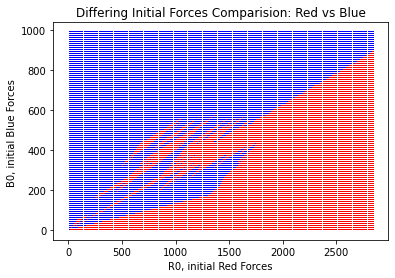

In [ ]:
winner = []
sides = ['red', 'blue']
test_init = []
fig, ax = plt.subplots()


for j in range(1, 2850,10):
  for i in range(1,1000,10):
    win = Dewar_Sim(j,i)[0]=="blue"
    if win == True:
      ax.plot(j,i, ",k", color = "r")
    if win == False: 
      ax.plot(j,i, ",k", color = "b")


ax.set_xlabel("R0, initial Red Forces")
ax.set_ylabel("B0, initial Blue Forces ")
ax.set_title("Differing Initial Forces Comparision: Red vs Blue")
plt.show

The following table summarizes the parameter variations for figures 1-6 in *A Study of Non-Monotonicity and Randomness in Combat Models*.

| Parameter | Figure 1  | Figure 2 | Figure 3 | Figure 4 | Figure 5 | Figure 6 |
| --------  | -------- | -------- | -------- | -------- | -------- | ------ |
| Red force ratio reinforcement threshold | 2.5 | $U(2.375, 2.625)$ | $U(2, 3)$ | 2.5 | 2.5 | $U(2, 3)$ |
| Red force strength reinforcement threshold | 0.8 | $U(0.76, 0.84)$ | $U(0.64, 0.96)$ | 0.8 | 0.8 | $U(0.64, 0.96)$ |
| Blue force ratio reinforcement threshold | 4 | $U(3.8, 4.2)$ | $U(3.2, 4.8)$ | 4 | 4 | $U(3.2, 4.8)$ |
| Blue force strength reinforcement threshold | 0.8 | $U(0.76, 0.84)$ | $U(0.64, 0.96)$ | 0.8 | 0.8 | $U(0.64, 0.96)$ |
| Red force ratio withdraw threshold | 1.5 | $U(1.425, 1.575)$ | $U(1.2, 1.8)$ | 1.5 | 1.5 | $U(1.2, 1.8)$ |
| Red force strength withdraw threshold | 0.7 | $U(0.665, 0.735)$ | $U(0.56, 0.84)$ | 0.7 | 0.7 | $U(0.56, 0.84)$ |
| Blue force ratio withdraw threshold | 10 | $U(9.5, 10.5)$ | $U(8, 12)$ | 10 | 10 | $U(8, 12)$ |
| Blue force strength withdraw threshold | 0.7 | $U(0.665, 0.735)$ | $U(0.56, 0.84)$ | 0.7 | 0.7 | $U(0.56, 0.84)$ |
| Red attrition factor threshold | 2048 | 2048 | 2048 | $N(2048, 4.525)$ | $N(2048, 45.255)$ | $N(2048, 45.255)$ |
| Blue attrition factor threshold | 512 | 512 | 512 | $N(512, 2.263)$ | $N(512, 22.627)$ | $N(512, 22.627)$ |

Replicate Figure 1-6 from Tom Lucas’ A Study of Non-Monotonicity and Randomness in Combat Models.  The initial blue forces are 500.  The initial red forces vary from 500 to 3,000 in steps of 10.  Run the model for 6,000 time periods to make sure all replications finish. To reduce the time required to produce these plots from “crazy long” to just “very long,” use 100 replications rather than the 1,000 that Tom used. Use the values or distributions for the parameters associated with each figure as give in the table below. Your figures, of course, will have greater variance, but should have an overall trend that replicates his figures, except for figure 5.  I don’t know how he got that figure, but my calculations yield something different.  Caution!  It took me between 30 and 60 minutes to create each of these figures.  So, after you hit the “run” button, do OJT, answer email, talk to your family or friends, check your social media, put on a good movie, etc.

#### 2.	[5 points] Recreate Figure 1.

I basically just had it return the period and a few other things to test. Nothing really changed here 

For my actual simulation though (Below this Dewar_Sim function defenition) I made a list called loser which takes whoever withdrew from the Dewar function and says, if it was not == "blue" then red must have one therefore we append a 0 to the list. Vice-Verca. We then plot the list for the y-axis and the x-axis is just the range of different initial R0 values. 

In [ ]:
#*****NO RANDOMNESS DEWAR SIM*****
def Dewar_Sim(init_red, init_blue):
    red = []
    red = np.append(red, init_red)
    red_reinf = []

    blue = []
    blue = np.append(blue, init_blue)
    blue_reinf = []
    blocks = [[5, 300, 70], [5, 300, 70]]
    reinforce_thresholds = [[2.5, 0.8*red[0]],[4.0, 0.8*blue[0]]]
    withdraw_thresholds = [[1.5, 0.7*red[0]],[10.0, 0.7*blue[0]]]

    period = 0
    FR = red[0]/blue[0]
    withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)
    while not(withdraw[0]):
        #Reinforcements
        blocks, activated = reinforcements(period, (red, blue), (red_reinf, blue_reinf), FR, blocks, reinforce_thresholds)
        red_reinf = np.append(red_reinf, activated[0])
        blue_reinf = np.append(blue_reinf, activated[1])
        #Add prior reinforcements, if any
        if period >=70:
            blue[period] += blue_reinf[period-70]
            red[period] += red_reinf[period-70]
        #Atrrition calculation
        blue = np.append(blue, attrition(blue[period], red[period], 1/2048))
        red = np.append(red, attrition(red[period], blue[period], 1/512))

        period += 1
        FR = red[period]/blue[period]
        withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)

    return withdraw[1], period

For figure 1, to save time and processing power, I only simulated once, since there is no random variation that we need to account for.It's completely deterministic, therefore multiple simulations would yield the same result

<function matplotlib.pyplot.show>

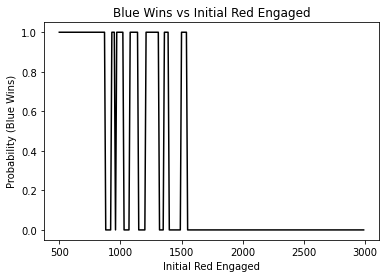

In [ ]:
winner = []
sides = ['red', 'blue']

def one_simulation(dewar_func):
  B0 = 500
  loser = []
  x_axis = []
  for i in range(500, 3000, 10):
    x_axis = np.append(x_axis, i)
    if dewar_func(i, B0)[0]=="blue":
      loser = np.append(loser, 0)
    else: 
      loser = np.append(loser, 1)
  return x_axis, loser

fig, ax = plt.subplots()
ax.plot(one_simulation(Dewar_Sim)[0], one_simulation(Dewar_Sim)[1], c = "k")
ax.set_title("Blue Wins vs Initial Red Engaged")
ax.set_xlabel("Initial Red Engaged")
ax.set_ylabel("Probability (Blue Wins)")
plt.show

In [ ]:
one_simulation(Dewar_Sim)

(array([ 500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,  580.,
         590.,  600.,  610.,  620.,  630.,  640.,  650.,  660.,  670.,
         680.,  690.,  700.,  710.,  720.,  730.,  740.,  750.,  760.,
         770.,  780.,  790.,  800.,  810.,  820.,  830.,  840.,  850.,
         860.,  870.,  880.,  890.,  900.,  910.,  920.,  930.,  940.,
         950.,  960.,  970.,  980.,  990., 1000., 1010., 1020., 1030.,
        1040., 1050., 1060., 1070., 1080., 1090., 1100., 1110., 1120.,
        1130., 1140., 1150., 1160., 1170., 1180., 1190., 1200., 1210.,
        1220., 1230., 1240., 1250., 1260., 1270., 1280., 1290., 1300.,
        1310., 1320., 1330., 1340., 1350., 1360., 1370., 1380., 1390.,
        1400., 1410., 1420., 1430., 1440., 1450., 1460., 1470., 1480.,
        1490., 1500., 1510., 1520., 1530., 1540., 1550., 1560., 1570.,
        1580., 1590., 1600., 1610., 1620., 1630., 1640., 1650., 1660.,
        1670., 1680., 1690., 1700., 1710., 1720., 1730., 1740., 1750.,
      

#### 3. [5 points] Recreate Figure 2.

Simply changed the fixed values with numpy uniform distributions 

Here, for each R0 value, I calculate the winner, and since there is randomness this time, I calculate the winner over and over since it can change. //

I iterate 100 times for EACH R0 value, and every 100 iterations, I plot the number of blue wins/ number of iterations which serves as a probability of blue winning. Then I plot this, and move to the next R0 vaue. 

# Dewar_Sim Functions for Part 2

In [ ]:
def Dewar_Sim_fig_2(init_red, init_blue):
    red = []
    red = np.append(red, init_red)
    red_reinf = []

    blue = []
    blue = np.append(blue, init_blue)
    blue_reinf = []
    blocks = [[5, 300, 70], [5, 300, 70]]
    reinforce_thresholds = [[np.random.uniform(2.375,2.626), np.random.uniform(0.76,0.84)*red[0]],[np.random.uniform(3.8,4.2), np.random.uniform(0.76,0.84)*blue[0]]]
    withdraw_thresholds = [[np.random.uniform(1.425,1.575), np.random.uniform(0.665,0.735)*red[0]],[np.random.uniform(9.5,10.5), np.random.uniform(0.665,0.735)*blue[0]]]

    period = 0
    FR = red[0]/blue[0]
    withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)
    while not(withdraw[0]):
        #Reinforcements
        blocks, activated = reinforcements(period, (red, blue), (red_reinf, blue_reinf), FR, blocks, reinforce_thresholds)
        red_reinf = np.append(red_reinf, activated[0])
        blue_reinf = np.append(blue_reinf, activated[1])
        #Add prior reinforcements, if any
        if period >=70:
            blue[period] += blue_reinf[period-70]
            red[period] += red_reinf[period-70]
        #Atrrition calculation
        blue = np.append(blue, attrition(blue[period], red[period], 1/2048))
        red = np.append(red, attrition(red[period], blue[period], 1/512))

        period += 1
        FR = red[period]/blue[period]
        withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)

    return withdraw[1]

In [ ]:
# #Figure 3 
def Dewar_Sim_fig_3(init_red, init_blue):
    red = []
    red = np.append(red, init_red)
    red_reinf = []

    blue = []
    blue = np.append(blue, init_blue)
    blue_reinf = []
    blocks = [[5, 300, 70], [5, 300, 70]]
    reinforce_thresholds = [[np.random.uniform(2,3), np.random.uniform(0.64, 0.96)*red[0]],[np.random.uniform(3.2, 4.8), np.random.uniform(0.64, 0.96)*blue[0]]]
    withdraw_thresholds = [[np.random.uniform(1.2, 1.8), np.random.uniform(0.56, 0.84)*red[0]],[np.random.uniform(8, 12), np.random.uniform(0.56, 0.84)*blue[0]]]

    period = 0
    FR = red[0]/blue[0]
    withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)
    while not(withdraw[0]):
        #Reinforcements
        blocks, activated = reinforcements(period, (red, blue), (red_reinf, blue_reinf), FR, blocks, reinforce_thresholds)
        red_reinf = np.append(red_reinf, activated[0])
        blue_reinf = np.append(blue_reinf, activated[1])
        #Add prior reinforcements, if any
        if period >=70:
            blue[period] += blue_reinf[period-70]
            red[period] += red_reinf[period-70]
        #Atrrition calculation
        blue = np.append(blue, attrition(blue[period], red[period], 1/2048))
        red = np.append(red, attrition(red[period], blue[period], 1/512))

        period += 1
        FR = red[period]/blue[period]
        withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)

    return withdraw[1]

In [ ]:
#Figure 4
def Dewar_Sim_fig_4(init_red, init_blue):
    red = []
    red = np.append(red, init_red)
    red_reinf = []

    blue = []
    blue = np.append(blue, init_blue)
    blue_reinf = []
    blocks = [[5, 300, 70], [5, 300, 70]]
    reinforce_thresholds = [[2.5, 0.8*red[0]],[4.0, 0.8*blue[0]]]
    withdraw_thresholds = [[1.5, 0.7*red[0]],[10.0, 0.7*blue[0]]]

    period = 0
    FR = red[0]/blue[0]
    withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)
    while not(withdraw[0]):
        #Reinforcements
        blocks, activated = reinforcements(period, (red, blue), (red_reinf, blue_reinf), FR, blocks, reinforce_thresholds)
        red_reinf = np.append(red_reinf, activated[0])
        blue_reinf = np.append(blue_reinf, activated[1])
        #Add prior reinforcements, if any
        if period >=70:
            blue[period] += blue_reinf[period-70]
            red[period] += red_reinf[period-70]
        #Atrrition calculation
        blue = np.append(blue, attrition(blue[period], red[period], 1/np.random.normal(2048,4.5255)))
        red = np.append(red, attrition(red[period], blue[period], 1/np.random.normal(512,2.263)))

        period += 1
        FR = red[period]/blue[period]
        withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)

    return withdraw[1]

In [ ]:
#Figure 5
def Dewar_Sim_fig_5(init_red, init_blue):
    red = []
    red = np.append(red, init_red)
    red_reinf = []

    blue = []
    blue = np.append(blue, init_blue)
    blue_reinf = []
    blocks = [[5, 300, 70], [5, 300, 70]]
    reinforce_thresholds = [[2.5, 0.8*red[0]],[4.0, 0.8*blue[0]]]
    withdraw_thresholds = [[1.5, 0.7*red[0]],[10.0, 0.7*blue[0]]]

    period = 0
    FR = red[0]/blue[0]
    withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)
    while not(withdraw[0]):
        #Reinforcements
        blocks, activated = reinforcements(period, (red, blue), (red_reinf, blue_reinf), FR, blocks, reinforce_thresholds)
        red_reinf = np.append(red_reinf, activated[0])
        blue_reinf = np.append(blue_reinf, activated[1])
        #Add prior reinforcements, if any
        if period >=70:
            blue[period] += blue_reinf[period-70]
            red[period] += red_reinf[period-70]
        #Atrrition calculation
        blue = np.append(blue, attrition(blue[period], red[period], 1/np.random.normal(2048,45.255)))
        red = np.append(red, attrition(red[period], blue[period], 1/np.random.normal(512,22.627)))

        period += 1
        FR = red[period]/blue[period]
        withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)

    return withdraw[1]

In [ ]:
#Figure 6
def Dewar_Sim_fig_6(init_red, init_blue):
    red = []
    red = np.append(red, init_red)
    red_reinf = []

    blue = []
    blue = np.append(blue, init_blue)
    blue_reinf = []
    blocks = [[5, 300, 70], [5, 300, 70]]
    reinforce_thresholds = [[np.random.uniform(2,3), np.random.uniform(0.64, 0.96)*red[0]],[np.random.uniform(3.2, 4.8), np.random.uniform(0.64, 0.96)*blue[0]]]
    withdraw_thresholds = [[np.random.uniform(1.2, 1.8), np.random.uniform(0.56, 0.84)*red[0]],[np.random.uniform(8, 12), np.random.uniform(0.56, 0.84)*blue[0]]]

    period = 0
    FR = red[0]/blue[0]
    withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)
    while not(withdraw[0]):
        #Reinforcements
        blocks, activated = reinforcements(period, (red, blue), (red_reinf, blue_reinf), FR, blocks, reinforce_thresholds)
        red_reinf = np.append(red_reinf, activated[0])
        blue_reinf = np.append(blue_reinf, activated[1])
        #Add prior reinforcements, if any
        if period >=70:
            blue[period] += blue_reinf[period-70]
            red[period] += red_reinf[period-70]
        #Atrrition calculation
        blue = np.append(blue, attrition(blue[period], red[period], 1/np.random.normal(2048,45.255)))
        red = np.append(red, attrition(red[period], blue[period], 1/np.random.normal(512,22.627)))

        period += 1
        FR = red[period]/blue[period]
        withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)

    return withdraw[1]

# Dewar Plots for Part 2: Figures 2-6

In [ ]:
iterations = 1


def multi_simulation_fig(dewar_func,iterations,title):

  fig, ax = plt.subplots()
  ax.set_title(title)
  ax.set_ylabel("Probability (Blue Wins)")
  ax.set_xlabel("Initial Red Engaged")
  B0 = 500
  count_blue = 0
  prob_list = []
  x_axis = []
  for j in range(500, 3000, 10):
    x_axis = np.append(x_axis, j)
    count_blue = 0
    for i in range(iterations):
        if dewar_func(j, B0)=="red": #blue won
          count_blue += 1
    prob_plot = count_blue/iterations 
    prob_list = np.append(prob_list, prob_plot)
  plt.plot(x_axis, prob_list)
  plt.gcf().set_size_inches(30,10)
  plt.show

  return 

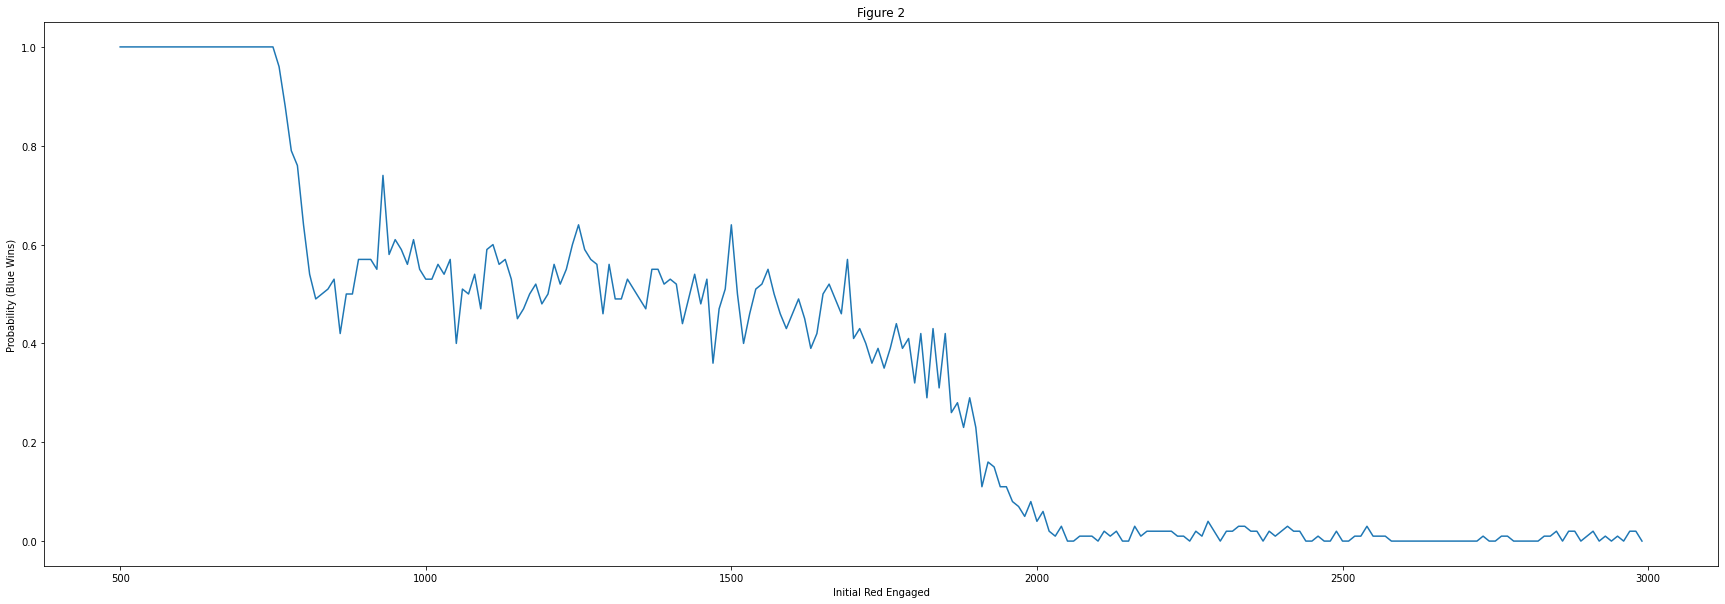

In [ ]:
multi_simulation_fig(dewar_func = Dewar_Sim_fig_2, iterations = 100, title = "Figure 2" )

#### 4. [5 points] Recreate Figure 3.

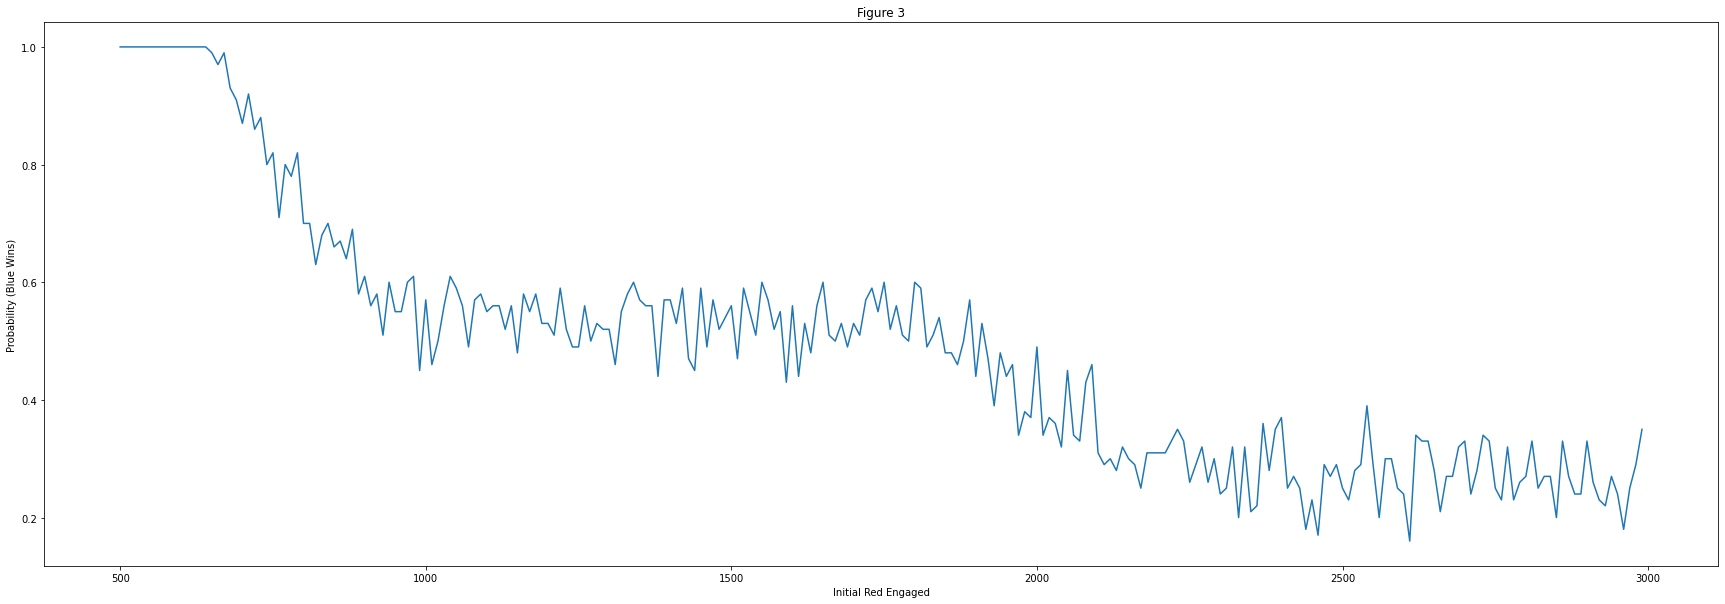

In [ ]:
multi_simulation_fig(dewar_func = Dewar_Sim_fig_3, iterations = 100, title = "Figure 3" )

Put description of changes here.

#### 5. [5 points] Recreate Figure 4.

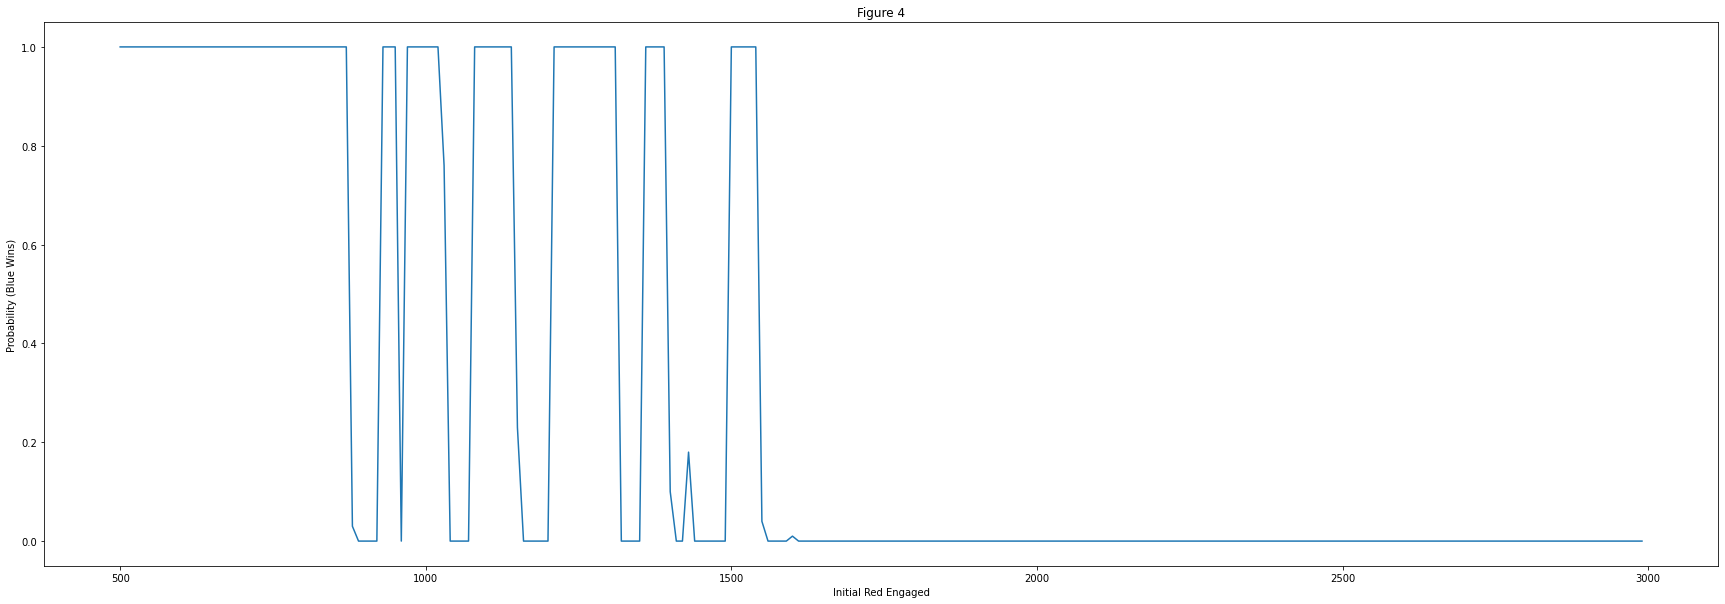

In [ ]:
multi_simulation_fig(dewar_func = Dewar_Sim_fig_4, iterations = 100, title = "Figure 4" )

#### 6. [5 points] Recreate Figure 5.

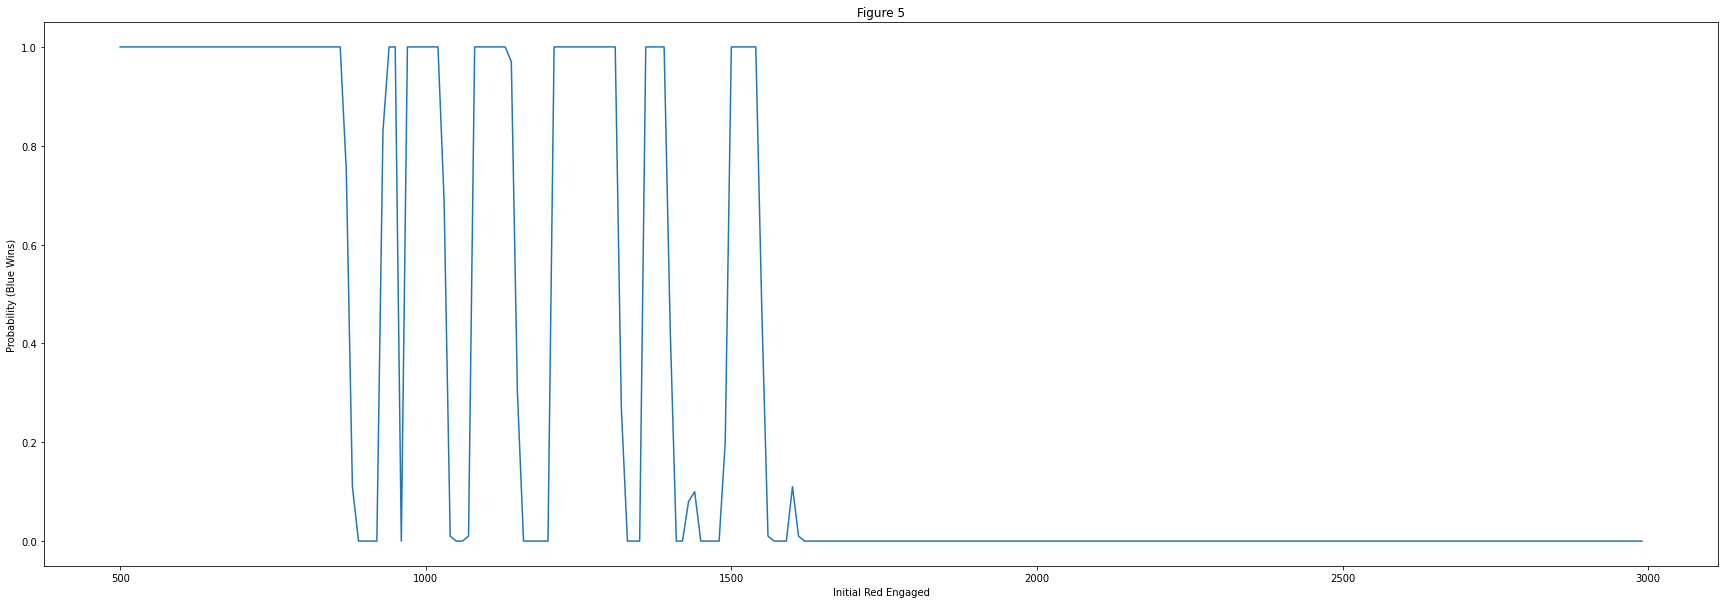

In [ ]:
multi_simulation_fig(dewar_func = Dewar_Sim_fig_5, iterations = 100, title = "Figure 5" )

#### 7. [5 points] Recreate Figure 6.

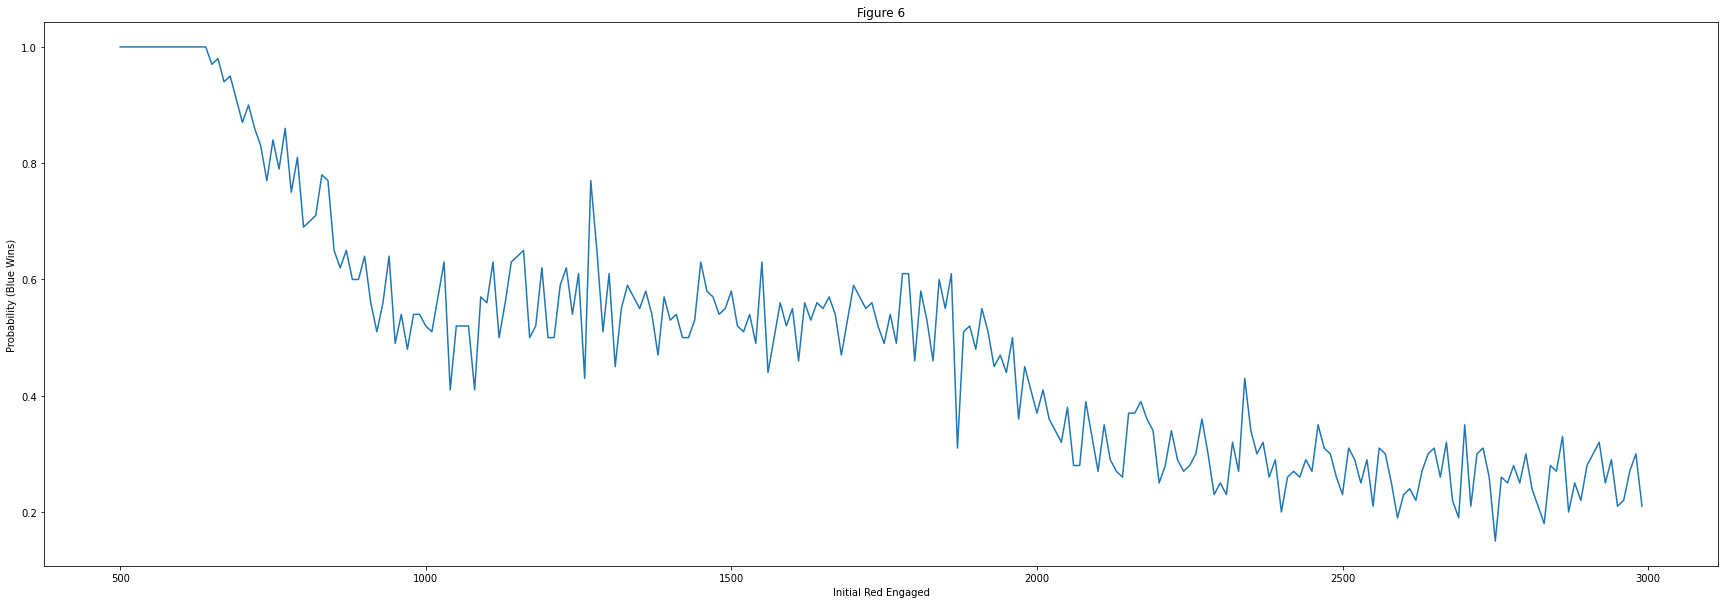

In [ ]:
multi_simulation_fig(dewar_func = Dewar_Sim_fig_6, iterations = 100, title = "Figure 6" )

# Description of Changes
For each figure I made a new Dewar Sim that had the corresponding changes based on the figure given up front. I used numpys uniform and normal distirbution for a majority of the changes. As you can see these figures have a lot more variation because we only ran 100 replications instead of 1000. 


I then created a function which iterated through the corresponding R0 iterations 100 times for each value of R0 taking the proporiton of blue wins over the total as a probability and ploting this over and over again. 


